# More Visualizations

Previously, we saw an overview of how pandas `plot` method worked and how to use the basic API of matplotlib. We'll provide more details in this lesson.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Global API

Matplotlib's default pyplot API has a global, MATLAB-style interface, as we've already seen:

In [3]:
x = np.arange(-10, 11)

In [4]:
x

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9,  10])

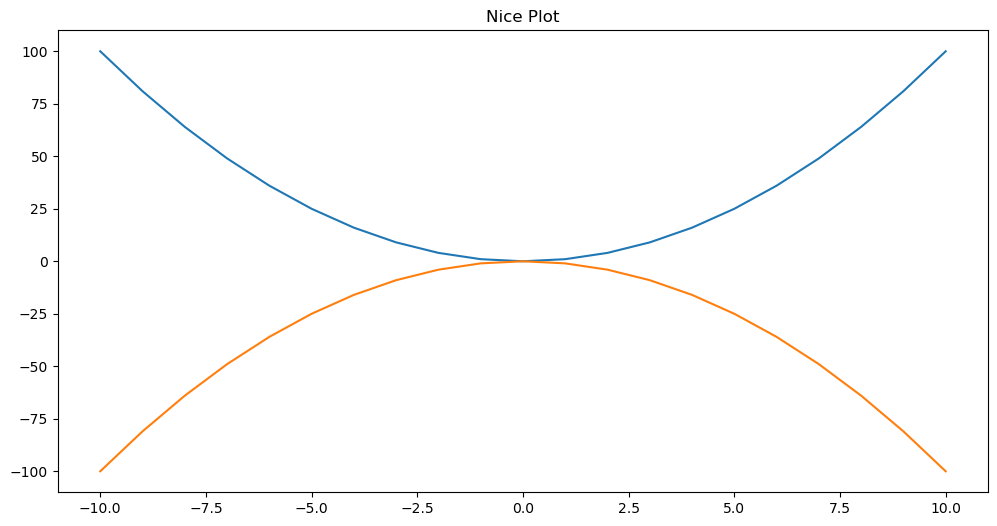

In [5]:
plt.figure(figsize=(12,6))

plt.title('Nice Plot')

plt.plot(x, x **2)
plt.plot(x, -1 * (x ** 2))

Text(0, 0.5, 'X Squared')

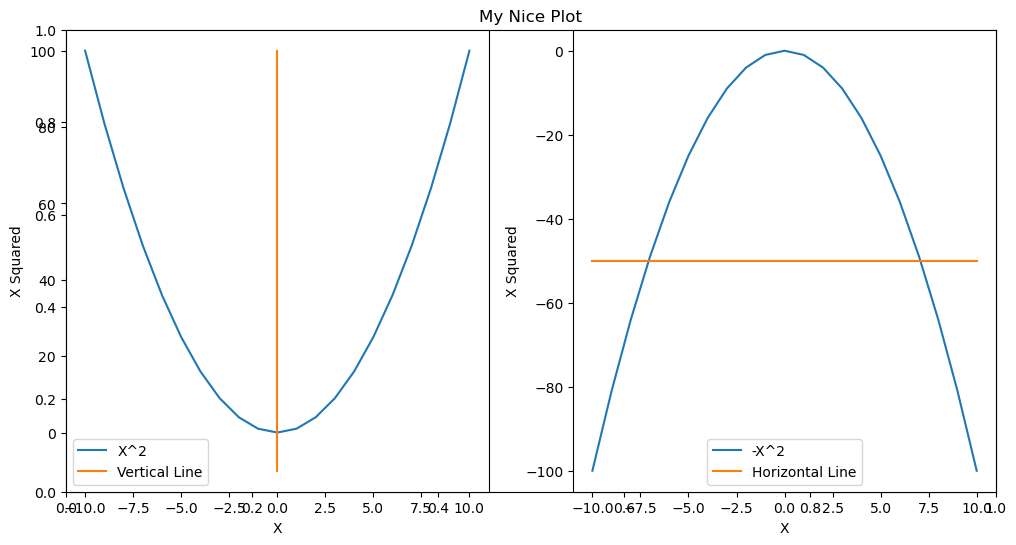

In [6]:
plt.figure(figsize=(12, 6))
plt.title('My Nice Plot')

plt.subplot(1, 2, 1)  # rows, columns, panel selected
plt.plot(x, x ** 2)
plt.plot([0, 0, 0], [-10, 0, 100])
plt.legend(['X^2', 'Vertical Line'])
plt.xlabel('X')
plt.ylabel('X Squared')

plt.subplot(1, 2, 2)
plt.plot(x, -1 * (x ** 2))
plt.plot([-10, 0, 10], [-50, -50, -50])
plt.legend(['-X^2', 'Horizontal Line'])

plt.xlabel('X')
plt.ylabel('X Squared')

## OOP Interface    

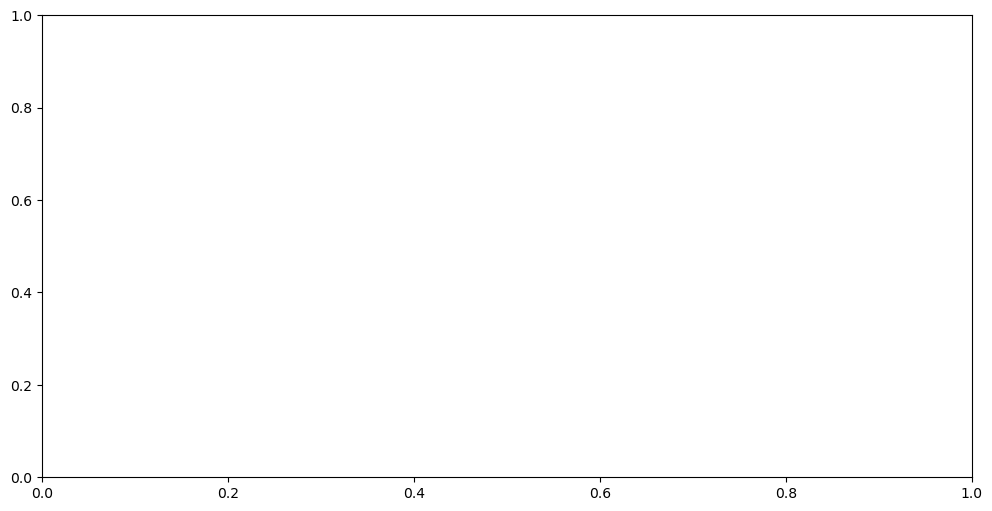

In [24]:
fig, axes = plt.subplots(figsize = (12, 6))

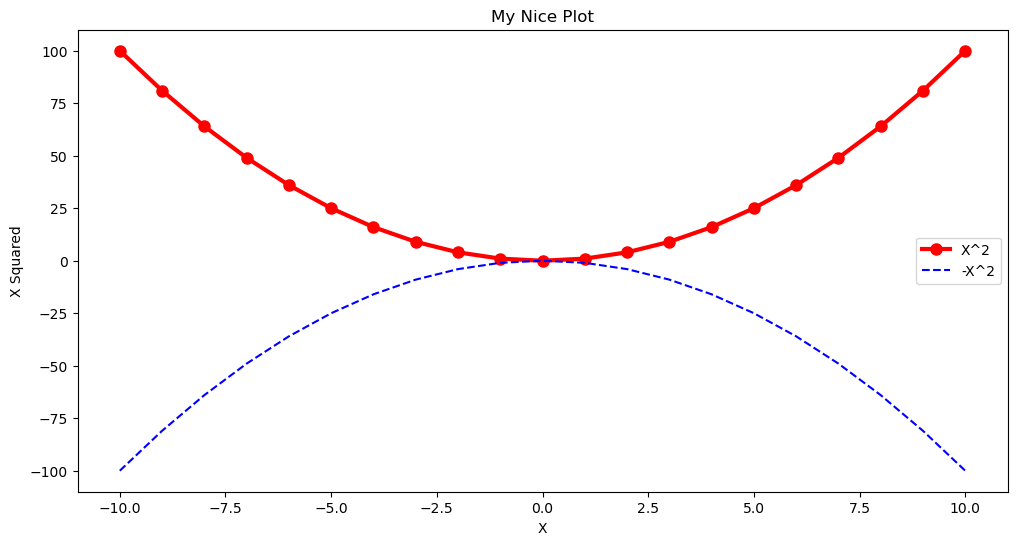

In [25]:
axes.plot(
    x, (x ** 2), color='red', linewidth=3,
    marker='o', markersize=8, label='X^2')

axes.plot(x, -1 * (x ** 2), 'b--', label='-X^2')

axes.set_xlabel('X')
axes.set_ylabel('X Squared')

axes.set_title("My Nice Plot")

axes.legend()

fig

Text(0.5, 1.0, 'My Nice Plot')

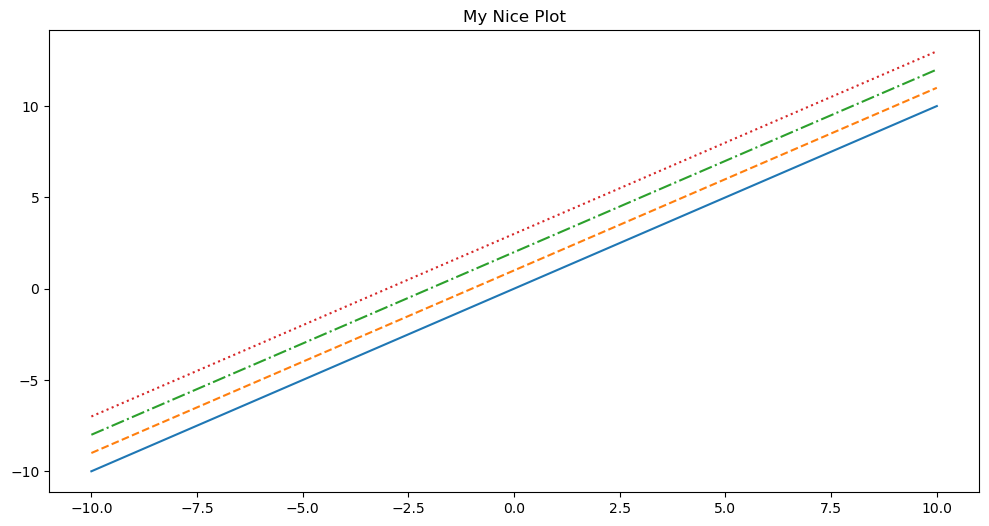

In [50]:
fig, axes = plt.subplots(figsize=(12, 6))

axes.plot(x, x+0, linestyle = 'solid')
axes.plot(x, x+1, linestyle ='dashed')
axes.plot(x, x+2, linestyle = 'dashdot')
axes.plot(x, x+3, linestyle = 'dotted')

axes.set_title('My Nice Plot')

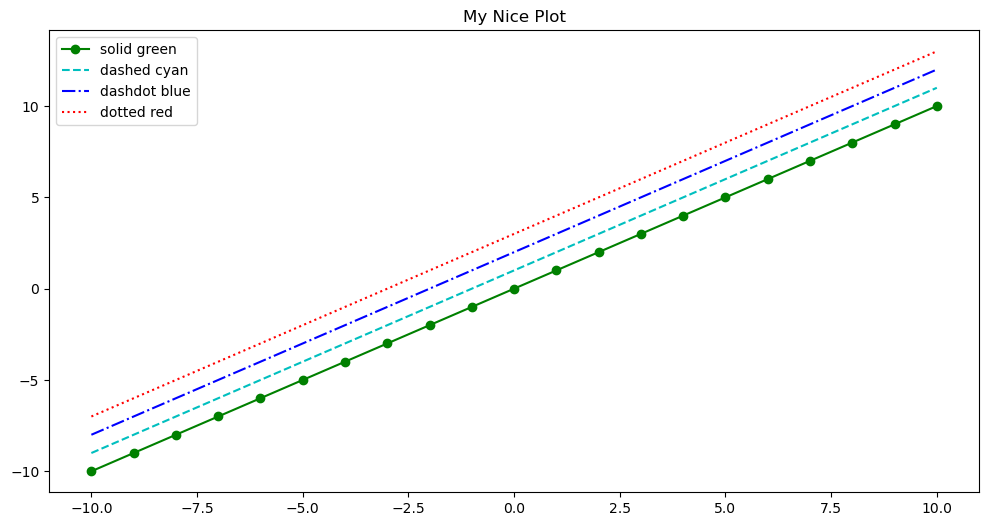

In [73]:
fig, axes = plt.subplots(figsize=(12, 6))

axes.plot(x, x+0, '-og', label='solid green')
axes.plot(x, x+1, '--c', label="dashed cyan")
axes.plot(x, x+2, '-.b', label='dashdot blue')
axes.plot(x, x+3, ':r', label='dotted red')

axes.set_title('My Nice Plot')
axes.legend()

There are a lot of line and marker types.

In [74]:
print('Markers: {}'.format([m for m in plt.Line2D.markers]))

Markers: ['.', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_', 'P', 'X', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'None', 'none', ' ', '']


In [75]:
linestyles = ['_', '-', '--', ':']

print('Line styles: {}'.format(linestyles))

Line styles: ['_', '-', '--', ':']
